In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
import sympy

$\def\bm{\boldsymbol}$
# リー群の１種、SE(2)での座標変換に使ってみるリー代数
- 定数ベクトル$\bm{p}$に対しリー代数$X$をかける事で微分方程式を作れる
$$
\dot{\bm{p}}(t) = X\bm{p}(t)
$$
- これで速度がわかるが、単位時刻を掛けて移動したと考えれば、そのまま座標変換として使える

In [2]:
theta_deg_1 = 30 #deg
v_1 = np.array([1, 2])
theta_deg_2 = 20 #deg
v_2 = np.array([3, 4])

theta1 = np.deg2rad(theta_deg_1) #rad
theta2 = np.deg2rad(theta_deg_2) #rad
x = sympy.Symbol('x')
y = sympy.Symbol('y')
theta = sympy.Symbol('theta')

# 変換行列
mat = sympy.Matrix(
    [[sympy.cos(theta), -sympy.sin(theta), x], 
     [sympy.sin(theta), sympy.cos(theta), y],
    [0, 0, 1]]
)
print("SE(2):")
display(mat)

mat1 = sympy.matrix2numpy(mat.subs([(theta,theta1), (x, v_1[0]), (y, v_1[1])])).astype(float)# 変換行列1
mat2 = sympy.matrix2numpy(mat.subs([(theta,theta2), (x, v_2[0]), (y, v_2[1])])).astype(float)# 変換行列2

SE(2):


Matrix([
[cos(theta), -sin(theta), x],
[sin(theta),  cos(theta), y],
[         0,           0, 1]])

## SE(2)のリー代数の基底
単位元は、回転1軸、並進２軸
$$
\begin{bmatrix}
   \cos(t) & -\sin(t) & 0 \\
   \sin(t) & \cos(t) & 0 \\
    0 & 0 & 1
\end{bmatrix},
\begin{bmatrix}
   1 & 0 & t \\
   0 & 1 & 0 \\
    0 & 0 & 1
\end{bmatrix},
\begin{bmatrix}
   1 & 0 & 0 \\
   0 & 1 & t \\
    0 & 0 & 1
\end{bmatrix}
$$

$t=0$で微分して
$$
\begin{bmatrix}
   0 & -1 & 0 \\
   1 & 0 & 0 \\
   0 & 0 & 0
\end{bmatrix},
\begin{bmatrix}
   0 & 0 & 1 \\
   0 & 0 & 0 \\
   0 & 0 & 0
\end{bmatrix},
\begin{bmatrix}
   0 & 0 & 0 \\
   0 & 0 & 1 \\
   0 & 0 & 0
\end{bmatrix}
$$

## ベクトル表示のパラメータ
回転して並進するというのがSE(2)の剛体変換であるが、
リー代数の空間で回転しながら旋回するみたいな事をするので、そのへんの辻褄を合わせてパラメータ(基底にかかる係数)を決める必要がある

パラメータ$\bm{\tau}=[\theta~~\bm{\rho}]^T \in \mathbb{R}^3$は以下を満たす
$$
Exp([\bm{\tau]_\wedge})= 
\begin{bmatrix}
   Exp([\theta]_\wedge]) & V(\theta)\bm{\rho}  \\
   \bm{0} & 1  
\end{bmatrix}\\
$$
ただし、
$$
V(\theta)=\frac{\sin\theta}{\theta}I+\frac{1-\cos \theta}{\theta} \frac{[\theta]_\wedge}{\theta}
$$

In [3]:
#基底を計算
K = sympy.diff(mat, theta).subs(theta, 0)#thetaで微分して0を代入
L = sympy.diff(mat, x)#xで微分
M = sympy.diff(mat, y)#yで微分
print("bases:")
display(K,L,M)

K = sympy.matrix2numpy(K).astype(float)
L = sympy.matrix2numpy(L).astype(float)
M = sympy.matrix2numpy(M).astype(float)

# リー代数を計算

V1 = np.sin(theta1)/theta1 * np.eye(2) + (1 - np.cos(theta1))/theta1 * K[:-1, :-1]
rho1 = np.linalg.inv(V1) @ v_1
alg1 = theta1 * K + rho1[0] * L + rho1[1] * M

V2 = np.sin(theta2)/theta2 * np.eye(2) + (1 - np.cos(theta2))/theta2 * K[:-1, :-1]
rho2 = np.linalg.inv(V2) @ v_2
alg2 = theta2 * K + rho2[0] * L + rho2[1] * M

print("Lie algebra1:\n{} \nLie algebra2:\n{}".format(alg1,alg2))

# SO(2)とR^2に分けてみたもの
alg1_rot = theta1 * K
alg1_tr = v_1[0] * L + v_1[1] * M
alg2_rot = theta2 * K
alg2_tr = v_2[0] * L + v_2[1] * M

bases:


Matrix([
[0, -1, 0],
[1,  0, 0],
[0,  0, 0]])

Matrix([
[0, 0, 1],
[0, 0, 0],
[0, 0, 0]])

Matrix([
[0, 0, 0],
[0, 0, 1],
[0, 0, 0]])

Lie algebra1:
[[ 0.         -0.52359878  1.50064739]
 [ 0.52359878  0.          1.69229785]
 [ 0.          0.          0.        ]] 
Lie algebra2:
[[ 0.         -0.34906585  3.66760792]
 [ 0.34906585  0.          3.43570285]
 [ 0.          0.          0.        ]]


In [4]:
mat1

array([[ 0.8660254, -0.5      ,  1.       ],
       [ 0.5      ,  0.8660254,  2.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [5]:
mat2

array([[ 0.93969262, -0.34202014,  3.        ],
       [ 0.34202014,  0.93969262,  4.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [6]:
# 指数写像して戻したものを確認
expm(alg1)

array([[ 0.8660254, -0.5      ,  1.       ],
       [ 0.5      ,  0.8660254,  2.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [7]:
expm(alg2)

array([[ 9.39692621e-01, -3.42020143e-01,  3.00000000e+00],
       [ 3.42020143e-01,  9.39692621e-01,  4.00000000e+00],
       [-3.12250226e-17, -2.77555756e-17,  1.00000000e+00]])

一致した！！

In [15]:
# SO(2)とR^2に分けてみたもの
expm(alg1_tr)@expm(alg1_rot) #回転と並進の順番は注意

array([[ 0.8660254, -0.5      ,  1.       ],
       [ 0.5      ,  0.8660254,  2.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [9]:
expm(alg2_tr)@expm(alg2_rot)

array([[ 0.93969262, -0.34202014,  3.        ],
       [ 0.34202014,  0.93969262,  4.        ],
       [ 0.        ,  0.        ,  1.        ]])

## 可視化してみる

In [10]:
def draw_vec(p, q, xlim=5, ylim=6):
    o = np.array([0, 0])
    vector = [(o, p, 'b'), (o, q, 'r' )]
    fig ,ax= plt.subplots(figsize=(xlim,ylim)) 
    for tail, head, color in vector:
        ax.quiver(*tail,*head,
                   color=color, units='xy', scale=1,linestyles='dashed',  linewidth=1)
    ax.set_xlim(0, xlim)
    ax.set_ylim(0, ylim)
    plt.grid()
    plt.show()

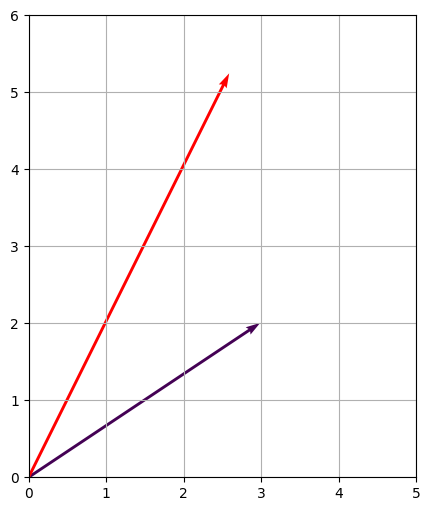

In [11]:
p = np.array([3, 2, 1])# 写像元ベクトル

q1 = (mat1 @ p )[:-1]
draw_vec(p, q1)

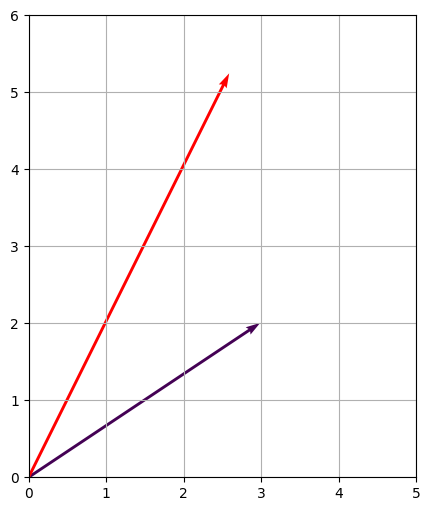

In [12]:
q2 = (expm(alg1) @ p )[:-1]
draw_vec(p, q2)

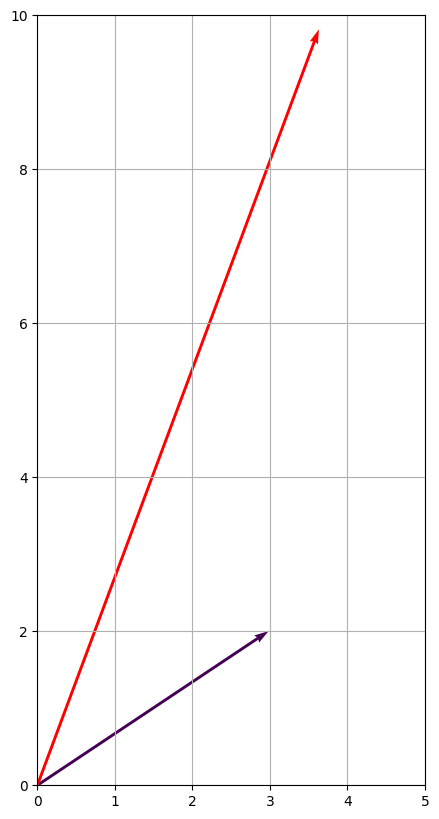

In [13]:
q3 = (mat2 @ mat1 @ p )[:-1]
draw_vec(p, q3, 5, 10)

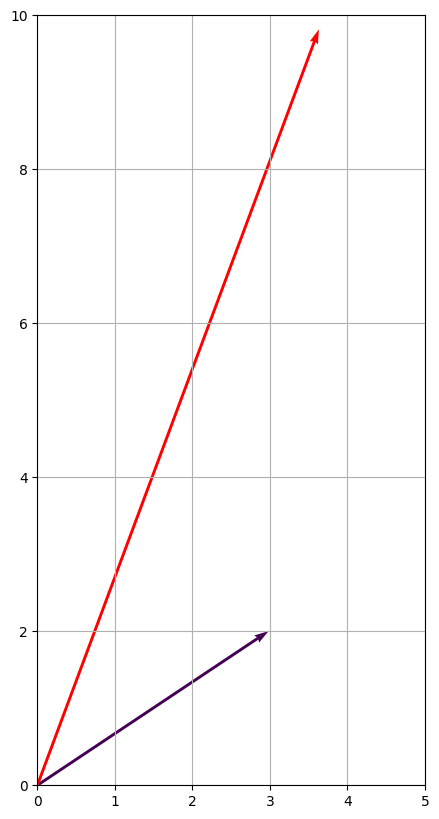

In [14]:
q4 = (expm(alg2)@expm(alg1) @ p )[:-1]
draw_vec(p, q4, 5, 10)